# 한국어 방언 (자연어) EDA

In [1]:
import json
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import collections
import urllib3
import ast

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings("ignore")

In [53]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

## 사용할 데이터 가져 오기

In [3]:
path='[라벨]경상도_학습데이터_1'
file_list=os.listdir(path)
file_list_py=[file for file in file_list if file.endswith('.json')]
file_list_py.sort()
#print(file_list_py)
DATA=file_list_py[0:10]
#len(DATA)
print(DATA)

['DKCI20000001.json', 'DKCI20000002.json', 'DKCI20000004.json', 'DKCI20000005.json', 'DKCI20000009.json', 'DKCI20000010.json', 'DKCI20000011.json', 'DKCI20000012.json', 'DKCI20000013.json', 'DKCI20000014.json']


In [35]:
Data=[]
for i in DATA:
    f=open(path +'/'+ i, 'rt', encoding='UTF-8')
    Data.append(json.loads(f.read()))

In [ ]:
len_rawdata=0
raw_data={"utterance":[]}
for k in range(0,100):
    if k <100:
        name="DKSR200000"+str(k)+".json"
        
    elif 100<= k and k<1000:
        name="DKSR20000"+str(k)+".json"
    try:
        f = open("[라벨]경상도_학습데이터_1/"+name, encoding="UTF-8")
        data = json.loads(f.read())
        raw_data["utterance"].extend(data["utterance"])
        #print(data["speaker"][1]["age"],data["speaker"][1]["birthplace"],data["speaker"][1]["principal_residence"])
        len_rawdata += 1
    except:
        #print(name)
        pass

In [33]:
raw_data["utterance"][0]

{'id': 'DKSR20000010.1.1.1',
 'form': '자 요즘 코로나 시국에',
 'standard_form': '자 요즘 코로나 시국에',
 'dialect_form': '자 요즘 코로나 시국에',
 'speaker_id': 'SR1560',
 'start': 0.01,
 'end': 6.55,
 'note': '',
 'eojeolList': [{'id': 1, 'eojeol': '자', 'standard': '자', 'isDialect': False},
  {'id': 2, 'eojeol': '요즘', 'standard': '요즘', 'isDialect': False},
  {'id': 3, 'eojeol': '코로나', 'standard': '코로나', 'isDialect': False},
  {'id': 4, 'eojeol': '시국에', 'standard': '시국에', 'isDialect': False}]}

In [38]:
len(raw_data["utterance"])

22500

In [39]:
data = raw_data

## 문장 리스트

In [40]:
dialect=[]

for i in range(len(data["utterance"])):
    dialect.append(data["utterance"][i]['dialect_form'])
dialect[:10] #방언

['자 요즘 코로나 시국에',
 '여행을 못 간지 진짜 오래된 거 같아.',
 '올해는 이천이십 년이 아니라 코로나력 일 년이라고 할 수 있지.',
 '사실 우리가 지금 여기에서 해외로 나가는 건 문제가 없는데',
 '해외에서 나갔다 한국으로 들어오면',
 '이 주 동안 자가 격리를 해야 하니까 여행가기가 참 부담스러운 거 같아.',
 '나도 해외 여행을 못 간지 벌써 일 년이 훨씬 넘어서 너무 해외에 가고 싶어.',
 '그런 의미에서 엄마는 이 코로나 시국이 완전히 종료가 되고',
 '안정이 되면 어느 나라에 한번 가보고 싶어?',
 '얘기 해 줘.']

In [41]:
# 표준어 문장 리스트
standard=[]

for i in range(len(data["utterance"])):
    standard.append(data["utterance"][i]['standard_form'])
standard[:10] #표준어

['자 요즘 코로나 시국에',
 '여행을 못 간지 진짜 오래된 거 같아.',
 '올해는 이천이십 년이 아니라 코로나력 일 년이라고 할 수 있지.',
 '사실 우리가 지금 여기에서 해외로 나가는 건 문제가 없는데',
 '해외에서 나갔다 한국으로 들어오면',
 '이 주 동안 자가 격리를 해야 하니까 여행가기가 참 부담스러운 거 같아.',
 '나도 해외 여행을 못 간지 벌써 일 년이 훨씬 넘어서 너무 해외에 가고 싶어.',
 '그런 의미에서 엄마는 이 코로나 시국이 완전히 종료가 되고',
 '안정이 되면 어느 나라에 한번 가보고 싶어?',
 '얘기 해 줘.']

## 기호 제외

In [42]:
new_dialect = ','.join(dialect)
#re.compile('[^ ㄱ-ㅣ가-힣+]').findall(string)
string=re.compile('[^, ㄱ-ㅣ가-힣+]').sub('',new_dialect)

In [43]:
# 기호 제외(방언)
string[:100]

'자 요즘 코로나 시국에,여행을 못 간지 진짜 오래된 거 같아,올해는 이천이십 년이 아니라 코로나력 일 년이라고 할 수 있지,사실 우리가 지금 여기에서 해외로 나가는 건 문제가 없는'

In [44]:
# 기호 제외(표준어)
new_standard = ','.join(standard)
string_=re.compile('[^, 가-힣+]').sub('',new_standard)

In [45]:
dialects=string.split(',')
standards=string_.split(',')

In [46]:
# 기호 제외한 문장(방언, 표준어)
df=pd.DataFrame({'dialect':dialects, 'standard':standards})
df

,dialect,standard
0,자 요즘 코로나 시국에,자 요즘 코로나 시국에
1,여행을 못 간지 진짜 오래된 거 같아,여행을 못 간지 진짜 오래된 거 같아
2,올해는 이천이십 년이 아니라 코로나력 일 년이라고 할 수 있지,올해는 이천이십 년이 아니라 코로나력 일 년이라고 할 수 있지
3,사실 우리가 지금 여기에서 해외로 나가는 건 문제가 없는데,사실 우리가 지금 여기에서 해외로 나가는 건 문제가 없는데
4,해외에서 나갔다 한국으로 들어오면,해외에서 나갔다 한국으로 들어오면
...,...,...
22495,아무래도 이제 쫌 저는 이게 쫌 발목이 안 좋아가지고,아무래도 이제 조금 저는 이게 조금 발목이 안 좋아가지고
22496,막 움직이는 거 뭐 테니스 배드민턴 이런 것도 해보고 싶기는 한데 그런 것들을 못 하니까,막 움직이는 거 뭐 테니스 배드민턴 이런 것도 해보고 싶기는 한데 그런 것들을 못 하니까
22497,이제 쫌 많이 안 움직이는 거 그냥 걷거나,이제 조금 많이 안 움직이는 거 그냥 걷거나
22498,가만히 있는거,가만히 있는거


## 글자 길이에 대한 시각화

### 히스토그램

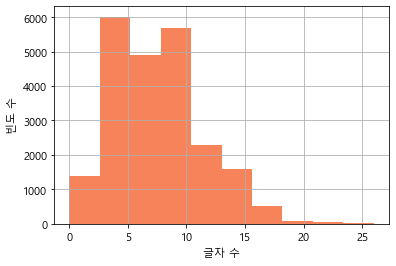

In [138]:
#글자수 히스토그램
ax = df['dialect'].str.split().map(lambda x: len(x)).hist(color='#f7835aff')
ax.set_xlabel('글자 수', size=11)
ax.set_ylabel('빈도 수', size=11)
plt.xticks(size=11)
plt.yticks(size=11)
plt.show()

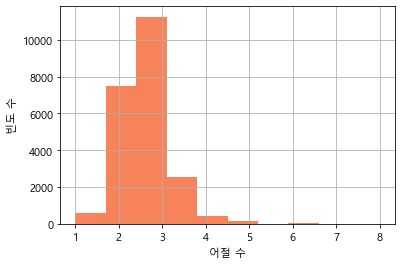

In [141]:
# 띄어쓰기로 나눈 글자 빈도수
ax = df['dialect'].str.split().\
   apply(lambda x : [len(i) for i in x]).\
   map(lambda x: np.mean(x)).hist(color='#f7835aff')

ax.set_xlabel('어절 수', size=11)
ax.set_ylabel('빈도 수', size=11)

plt.xticks(size=11)
plt.yticks(size=11)
plt.show()

In [49]:
# 방언(dia)
dialect=df['dialect'].to_list()
dia=[]

for i in dialect:
    dia.append(i.split(' '))
dia[:10] #문장을 어절단위로 나눈 리스트(리스트 안의 리스트)

[['자', '요즘', '코로나', '시국에'],
 ['여행을', '못', '간지', '진짜', '오래된', '거', '같아'],
 ['올해는', '이천이십', '년이', '아니라', '코로나력', '일', '년이라고', '할', '수', '있지'],
 ['사실', '우리가', '지금', '여기에서', '해외로', '나가는', '건', '문제가', '없는데'],
 ['해외에서', '나갔다', '한국으로', '들어오면'],
 ['이', '주', '동안', '자가', '격리를', '해야', '하니까', '여행가기가', '참', '부담스러운', '거', '같아'],
 ['나도',
  '해외',
  '여행을',
  '못',
  '간지',
  '벌써',
  '일',
  '년이',
  '훨씬',
  '넘어서',
  '너무',
  '해외에',
  '가고',
  '싶어'],
 ['그런', '의미에서', '엄마는', '이', '코로나', '시국이', '완전히', '종료가', '되고'],
 ['안정이', '되면', '어느', '나라에', '한번', '가보고', '싶어'],
 ['얘기', '해', '줘']]

In [50]:
# 표준어(sta)
standard=df['standard'].to_list()
sta=[]

for i in standard:
    sta.append(i.split(' '))

In [51]:
# 방언(strings)
strings=string.split(' ')
strings[:10] #어절별로 나눈 리스트(리스트)

['자', '요즘', '코로나', '시국에,여행을', '못', '간지', '진짜', '오래된', '거', '같아,올해는']

In [52]:
#표준어(strings_)
strings_=string.split(' ')

### 어절별 빈도수

In [57]:
# 2글자 이상
strings2=[]
for i in strings:
    if len(i)>=2:
        strings2.append(i)

Text(0.5, 1.0, '어절별 빈도수 (2글자 이상)')

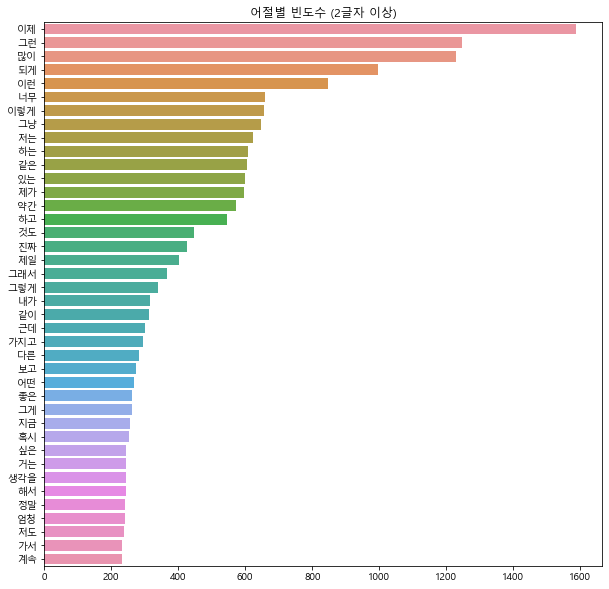

In [58]:
# 어절별 빈도수(2글자 이상)
count=collections.Counter(strings2)
most=count.most_common()

x,y=[],[]
for word, count in most[:40]:
    x.append(word)
    y.append(count)

#plt.rcParams['font.family']='NanumGothic'    
plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x)
plt.title('어절별 빈도수 (2글자 이상)')
plt.show()

### 문장길이 시각화

In [59]:
#문장길이 데이터
df_length = df['dialect'].apply(len)
df_length.head()

0    12
1    20
2    34
3    32
4    18
Name: dialect, dtype: int64

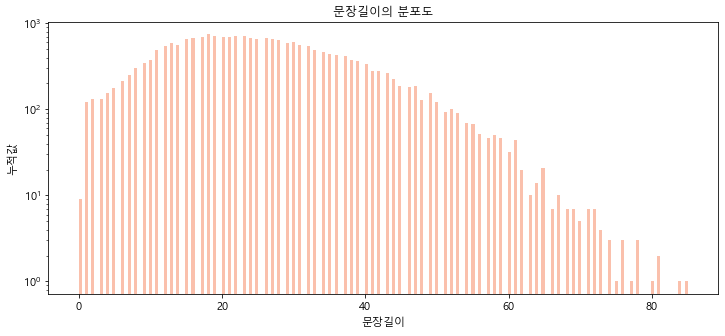

In [143]:
#문장길이의 분포도
plt.figure(figsize=(12,5))
plt.hist(df_length, bins=200, alpha=0.5, color='#f7835aff', label='word')
plt.yscale('log', nonposy='clip')
plt.title('문장길이의 분포도')
plt.xlabel('문장길이', size=11)
plt.ylabel('누적값', size=11)
plt.xticks(size=11)
plt.yticks(size=11)
plt.show()

### 문장길이 boxplot

In [61]:
# 문장길이 관련 통계값
print('문장 길이 최대값 : {}'.format(np.max(df_length)))
print('문장 길이 최소값 : {}'.format(np.min(df_length)))
print('문장 길이 평균값 : {:.2f}'.format(np.mean(df_length)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(df_length)))
print('문장 길이 중간값 : {}'.format(np.median(df_length)))

print('문장 길이 제1사분위 : {}'.format(np.percentile(df_length, 25)))
print('문장 길이 제3사분위 : {}'.format(np.percentile(df_length, 75)))

문장 길이 최대값 : 85
문장 길이 최소값 : 0
문장 길이 평균값 : 25.61
문장 길이 표준편차 : 12.59
문장 길이 중간값 : 24.0
문장 길이 제1사분위 : 16.0
문장 길이 제3사분위 : 34.0


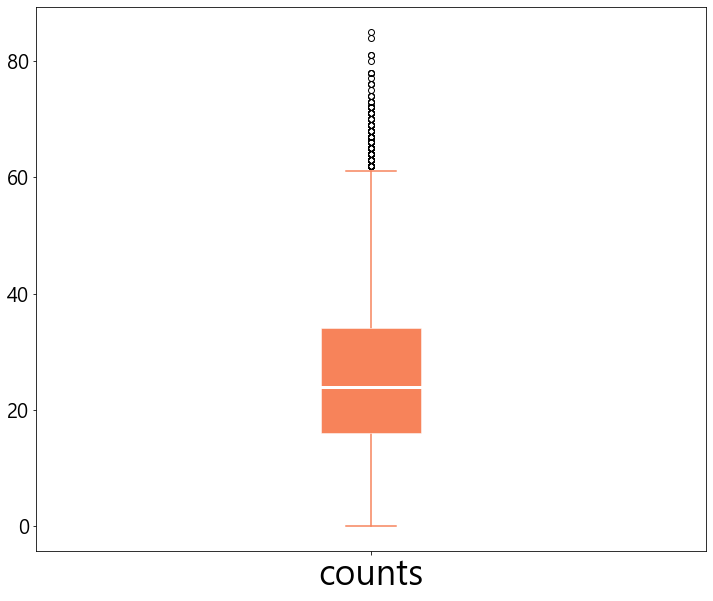

In [176]:
# 문장길이에 대한 시각화(박스플롯)
plt.figure(figsize=(12,10))
plt.boxplot(df_length, labels=['counts'], showmeans=False,patch_artist=True, medianprops={"color": "white", "linewidth": 3.0}, boxprops={"facecolor": "#f7835aff", "edgecolor": "white","linewidth": 0.5}, whiskerprops={"color": "#f7835aff", "linewidth": 1.5},capprops={"color": "#f7835aff", "linewidth": 1.5}

)
#plt.grid(color='#f7835aff')
plt.xticks(size=35)
plt.yticks(size=20)
plt.show()

## ETRI 형태소 분석을 이용한 문장 분석

In [65]:
# 2000문장 사용
Dialect=dialect[:2000]

In [66]:
#etri 형태소 분석 API를 이용한 문장 분석

openApiURL = "http://aiopen.etri.re.kr:8000/WiseNLU"

#"7f039a3d-31ea-40ec-938e-4bbfbb0fbc16"
#"bd6d2bff-4e44-4035-8591-947fda262051"
#"aba3a45d-3318-4061-8a5d-799c8521b082"

accessKey = "bd6d2bff-4e44-4035-8591-947fda262051"
analysisCode = "morp"

lem=[]
typ=[]
for i in Dialect:
    text=i
    
    requestJson = {
        "access_key": accessKey,
        "argument": {
            "text": text,
            "analysis_code": analysisCode
        }
    }

    http = urllib3.PoolManager()
    response = http.request(
        "POST",
        openApiURL,
        headers={"Content-Type": "application/json; charset=UTF-8"},
        body=json.dumps(requestJson)
    )

    tmp = ast.literal_eval(response.data.decode('utf-8'))
    #print(tmp["return_object"]["sentence"][0])
    Tmp=tmp["return_object"]["sentence"][0]['morp']

    for x in Tmp:
            lem.append(x.get('lemma'))
            typ.append(x.get('type'))


In [67]:
# 데이터프레임
TMP=pd.DataFrame({'lemma':lem, 'type':typ})
TMP

,lemma,type
0,자,IC
1,요즘,NNG
2,코로나,NNP
3,시국,NNG
4,에,JKB
...,...,...
31540,그런,MM
31541,스토브,NNG
31542,리그,NNG
31543,이,VCP


In [86]:
TMP.to_csv("TMP.csv")

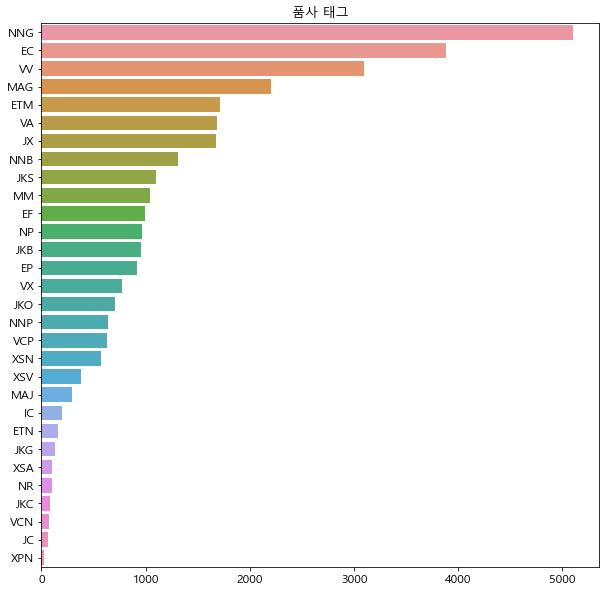

In [174]:
# 품사별 빈도수
count=collections.Counter(TMP["type"])
most=count.most_common()

x,y=[],[]
for word, count in most[:30]:
    x.append(word)
    y.append(count)

#plt.rcParams['font.family']='NanumGothic'    
plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x)
plt.title('품사 태그', size=13)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

In [182]:
# key,value 뒤집기
words=TMP['lemma'].to_dict()
word={v:k for k,v in words.items()}
word

{'자': 30145,
 '요즘': 30906,
 '코로나': 17600,
 '시국': 109,
 '에': 31539,
 '여행': 21034,
 '을': 31488,
 '못': 31001,
 '간지': 8,
 '진짜': 31219,
 '오래': 16984,
 '되': 31491,
 'ㄴ': 31525,
 '것': 31518,
 '같': 31519,
 '어': 31425,
 '올해': 7673,
 '는': 31507,
 '이천': 18,
 '이십': 25999,
 '년': 31162,
 '이': 31543,
 '아니': 31310,
 '라': 30824,
 '력': 29957,
 '일': 31375,
 '라고': 30916,
 '하': 31511,
 'ㄹ': 31504,
 '수': 31505,
 '있': 31527,
 '지': 30752,
 '사실': 19222,
 '우리': 23209,
 '가': 31372,
 '지금': 30123,
 '여기': 25671,
 '에서': 31218,
 '해외': 5859,
 '로': 31026,
 '나가': 27622,
 '문제': 17288,
 '없': 31469,
 '는데': 31537,
 '었': 31470,
 '다': 31175,
 '한국': 30917,
 '으로': 31405,
 '들어오': 28195,
 '면': 30239,
 '주': 29315,
 '동안': 25681,
 '격리': 65,
 '를': 31502,
 '어야': 31008,
 '니까': 31167,
 '여행가기': 71,
 '참': 25700,
 '부담': 13943,
 '스럽': 27929,
 '나': 30796,
 '도': 31532,
 'ㄴ지': 31342,
 '벌써': 88,
 '훨씬': 16717,
 '넘': 12987,
 '어서': 31492,
 '너무': 31303,
 '고': 31512,
 '싶': 31205,
 '그런': 31540,
 '의미': 15572,
 '엄마': 13501,
 '완전히': 111,
 '종료': 112,
 '안

In [183]:
word

{'자': 30145,
 '요즘': 30906,
 '코로나': 17600,
 '시국': 109,
 '에': 31539,
 '여행': 21034,
 '을': 31488,
 '못': 31001,
 '간지': 8,
 '진짜': 31219,
 '오래': 16984,
 '되': 31491,
 'ㄴ': 31525,
 '것': 31518,
 '같': 31519,
 '어': 31425,
 '올해': 7673,
 '는': 31507,
 '이천': 18,
 '이십': 25999,
 '년': 31162,
 '이': 31543,
 '아니': 31310,
 '라': 30824,
 '력': 29957,
 '일': 31375,
 '라고': 30916,
 '하': 31511,
 'ㄹ': 31504,
 '수': 31505,
 '있': 31527,
 '지': 30752,
 '사실': 19222,
 '우리': 23209,
 '가': 31372,
 '지금': 30123,
 '여기': 25671,
 '에서': 31218,
 '해외': 5859,
 '로': 31026,
 '나가': 27622,
 '문제': 17288,
 '없': 31469,
 '는데': 31537,
 '었': 31470,
 '다': 31175,
 '한국': 30917,
 '으로': 31405,
 '들어오': 28195,
 '면': 30239,
 '주': 29315,
 '동안': 25681,
 '격리': 65,
 '를': 31502,
 '어야': 31008,
 '니까': 31167,
 '여행가기': 71,
 '참': 25700,
 '부담': 13943,
 '스럽': 27929,
 '나': 30796,
 '도': 31532,
 'ㄴ지': 31342,
 '벌써': 88,
 '훨씬': 16717,
 '넘': 12987,
 '어서': 31492,
 '너무': 31303,
 '고': 31512,
 '싶': 31205,
 '그런': 31540,
 '의미': 15572,
 '엄마': 13501,
 '완전히': 111,
 '종료': 112,
 '안

In [68]:
# key,value 뒤집기
words=TMP['lemma'].to_dict()
word={v:k for k,v in words.items()}


## 방언, 표준어 사전

In [88]:
# 방언, 표준어 사전
Dia=[] #방언
Sta=[] #표준어

for x in range(len(data['utterance'])):
    eojeol=data['utterance'][x]
    
    for y in range(len(eojeol['eojeolList'])):
        if eojeol['eojeolList'][y]['isDialect'] == True:
            try:
                dial = eojeol['eojeolList'][y]['eojeol']
                stan = eojeol['eojeolList'][y]['standard']
                
                Dia.append(dial)
                Sta.append(stan)
            
            except:
                pass

df2=pd.DataFrame({'dialect':Dia, 'standard':Sta})


In [95]:
len(df2)

1211

In [97]:
df2

,dialect,standard
0,인자,이제
1,그기,거기
2,인저,이제
3,인자,이제
4,쫌,조금
...,...,...
1206,쫌,조금
1207,쫌,조금
1208,쫌,조금
1209,쫌,조금


### 워드 클라우드(표준어,방언)

In [114]:
frequency_d = collections.Counter(df2["dialect"])
frequency_s = collections.Counter(df2["standard"])

In [98]:
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

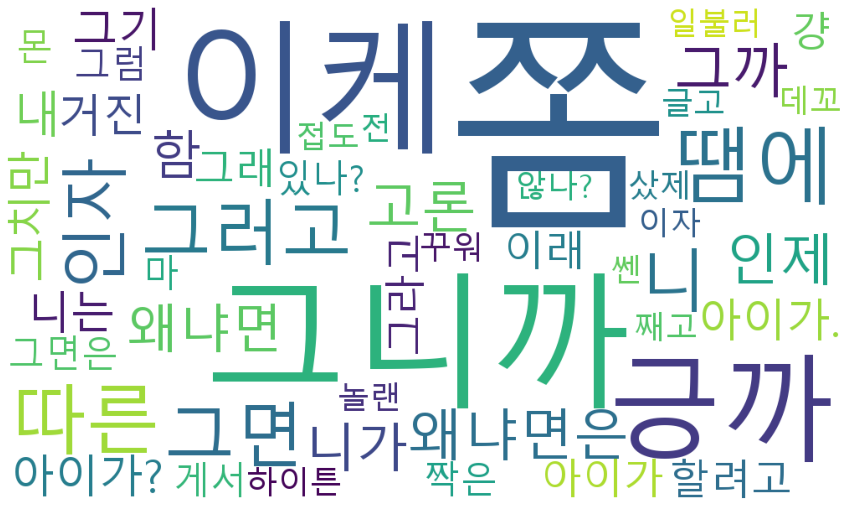

In [113]:
plt.figure(figsize=(15,10))
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(frequency_d))
plt.axis("off")
plt.show()

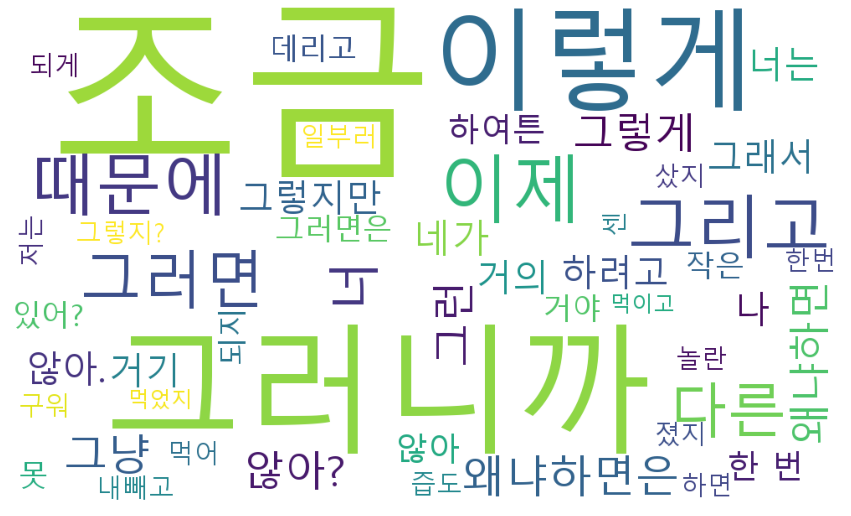

In [115]:
plt.figure(figsize=(15,10))
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(frequency_s))
plt.axis("off")
plt.show()